<a href="https://colab.research.google.com/github/2018jangminjun/python/blob/main/HeartDiseaseClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

np.random.seed(3)
tf.random.set_seed(3)

df = pd.read_csv('https://raw.githubusercontent.com/2018jangminjun/python/main/heart%20disease%20data')
print('결측치 개수:',df.isnull().sum())

df = df.fillna(df.mean())
df = pd.get_dummies(df)
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_df_scaled = pd.DataFrame(data = df_scaled)
df = df_df_scaled

A = df.iloc[:,0:15] 
B = df.iloc[:,15:17]

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.1, shuffle = True)

model = Sequential()
model.add(Dense(24, input_dim=15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2)) #dropout 사용
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping('val_accuracy', patience=20)
modelpath = "./data/model/bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor= 'val_accuracy', verbose=0, save_best_only=True)
history = model.fit(A_train, B_train, epochs =100, batch_size=50, validation_split=0.2, callbacks = [early_stopping, checkpointer])


결측치 개수: Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  app.launch_new_instance()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                384       
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
Total params: 656
Trainable params: 656
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 4s 302ms/step - loss: -0.1084 - accuracy: 0.5300 - val_loss: -0.2256 - val_accuracy: 0.5455
Epoch 2/100
5/5 [==============================

In [ ]:
accuracy = model.evaluate(A_test, B_test)
print('test dataset으로 구한 accuracy:',accuracy[1])

1/1 [==============================] - 0s 61ms/step - loss: -5.8258 - accuracy: 0.8710
test dataset으로 구한 accuracy: 0.8709677457809448


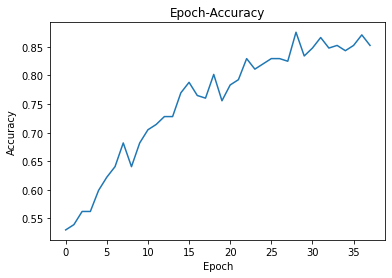

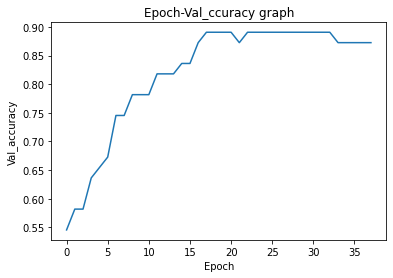

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Epoch-Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title('Epoch-Val_ccuracy graph')
plt.xlabel('Epoch')
plt.ylabel('Val_accuracy')
plt.show()